<div style="font-size: 36px">
    Final Project Group 15
</div> <br> 
<em>Sihua Zhou (sz583), Hench Wu(hhw14), Deep Patel (dp1062), Joshua Clayton (jrc428)<em>

**The purpose of this project is to analyze video game sales data to provide valuable insights for both experienced and new gamers. By examining top-selling games, publishers, genres, and platforms, the project aims to guide gamers in exploring diverse gaming experiences and making informed choices. The analysis helps highlight trends, popular titles, and reputable developers, enhancing the gaming community's understanding and enjoyment of video games.**

*Dataset's name: Video Game Sales* <br>
*Dataset's author: GREGORYSMITH* <br>
*Dataset is from: https://www.kaggle.com/datasets/gregorut/videogamesales*

**0. Import Dataset and Briefing.**

In [45]:
import pandas as pd

dataframe = pd.read_csv("vgsales.csv")

display(dataframe)
display(dataframe.describe())
display(dataframe.info())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


None

<div style="font-size: 30px">
    For Experienced Gamers:
</div>

**1. Top 3 games sold by each publisher**
>*(reason: Additional information for experienced players to explore games from different publishers)*

In [46]:
publisher_top_3_games_df = dataframe.groupby("Publisher")

publisher_top_3_games_dict = {}
for scalar,df in publisher_top_3_games_df:
    length_3 = False
    if len(df.index) < 3:
        publisher_top_3_games_dict[scalar] = list(df["Name"]) + ["None"]*(3-len(df.index))
    else:
        publisher_top_3_games_dict[scalar] = list(df.nlargest(3, "Global_Sales")["Name"])
    
publisher_top_3_games_df = pd.DataFrame(publisher_top_3_games_dict, index=["First", "Second", "Third"])
pd.set_option('display.max_columns', None)
display(publisher_top_3_games_df)

,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,Arc System Works,Arena Entertainment,Aria,Arika,ArtDink,Aruze Corp,Ascaron Entertainment,Ascaron Entertainment GmbH,Asgard,Asmik Ace Entertainment,Asmik Corp,Aspyr,Astragon,Asylum Entertainment,Atari,Athena,Atlus,Avalon Interactive,Avanquest,Avanquest Software,Axela,BAM! Entertainment,BMG Interactive Entertainment,BPS,Banpresto,Benesse,Berkeley,Bethesda Softworks,Big Ben Interactive,Big Fish Games,Bigben Interactive,Black Bean Games,Black Label Games,Blast! Entertainment Ltd,Blue Byte,Bohemia Interactive,Bomb,Boost On,Brash Entertainment,Broccoli,BushiRoad,CBS Electronics,CCP,CDV Software Entertainment,CPG Products,CTO SpA,Capcom,Cave,ChunSoft,City Interactive,Cloud Imperium Games Corporation,Coconuts Japan,Codemasters,Codemasters Online,CokeM Interactive,Coleco,Comfort,Commseed,Compile,Compile Heart,Conspiracy Entertainment,Core Design Ltd.,Crave Entertainment,Creative Core,Crimson Cow,Crystal Dynamics,Culture Brain,Culture Publishers,CyberFront,Cygames,D3Publisher,DHM Interactive,DSI Games,DTP Entertainment,Daedalic,Daedalic Entertainment,Daito,Data Age,Data Design Interactive,Data East,Datam Polystar,Deep Silver,"Destination Software, Inc",Destineer,Detn8 Games,Devolver Digital,DigiCube,Disney Interactive Studios,Dorart,DreamCatcher Interactive,DreamWorks Interactive,Dusenberry Martin Racing,EA Games,EON Digital Entertainment,ESP,Easy Interactive,Ecole,Edia,Eidos Interactive,Electronic Arts,Electronic Arts Victor,Elf,Elite,Empire Interactive,Encore,Enix Corporation,Enjoy Gaming ltd.,Enterbrain,Epic Games,Epoch,Ertain,Essential Games,Evolution Games,Evolved Games,Excalibur Publishing,Experience Inc.,Extreme Entertainment Group,Falcom Corporation,Fields,Flashpoint Games,Flight-Plan,Focus Home Interactive,Focus Multimedia,Foreign Media Games,Fortyfive,Fox Interactive,From Software,FuRyu,FuRyu Corporation,Fuji,FunSoft,Funbox Media,Funcom,Funsta,G.Rev,GN Software,GOA,GSP,GT Interactive,Gaga,Gainax Network Systems,Gakken,Game Arts,Game Factory,Game Life,GameMill Entertainment,GameTek,Gamebridge,Gamecock,Gameloft,Gathering of Developers,General Entertainment,Genki,Genterprise,Ghostlight,Giga,Giza10,Glams,Global A Entertainment,Global Star,Gotham Games,Graffiti,Grand Prix Games,Graphsim Entertainment,Gremlin Interactive Ltd,Griffin International,Groove Games,GungHo,Gust,HAL Laboratory,HMH Interactive,Hackberry,Hamster Corporation,Happinet,Harmonix Music Systems,Hasbro Interactive,Havas Interactive,Headup Games,Hearty Robin,Hect,Hello Games,Her Interactive,Hip Interactive,Home Entertainment Suppliers,Hudson Entertainment,Hudson Soft,Human Entertainment,HuneX,IE Institute,ITT Family Games,Iceberg Interactive,Idea Factory,Idea Factory International,Ignition Entertainment,Illusion Softworks,Imadio,Image Epoch,Imageworks,Imagic,Imagineer,Imax,Indie Games,Infogrames,Insomniac Games,Interchannel,Interchannel-Holon,Intergrow,Interplay,Interplay Productions,"Interworks Unlimited, Inc.",Inti Creates,Introversion Software,Irem Software Engineering,Ivolgamus,JVC,Jack of All Games,Jaleco,Jester Interactive,JoWood Productions,Jorudan,Just Flight,KID,KSS,Kadokawa Games,Kadokawa Shoten,Kaga Create,Kalypso Media,Kamui,Kando Games,Karin Entertainment,Kemco,Kids Station,King Records,Knowledge Adventure,Koch Media,Kokopeli Digital Studios,Konami Digital Entertainment,Kool Kizz,LEGO Media,LSP Games,Laguna,Legacy Interactive,Level 5,Lexicon Entertainment,Licensed 4U,Lighthouse Interactive,Liquid Games,Little Orbit,Locus,LucasArts,MC2 Entertainment,MLB.com,MTO,MTV Gam

**2. Top 10 games sold globally**
>*(reason: Additional information for experienced players in case they missed one of best selling games)*

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


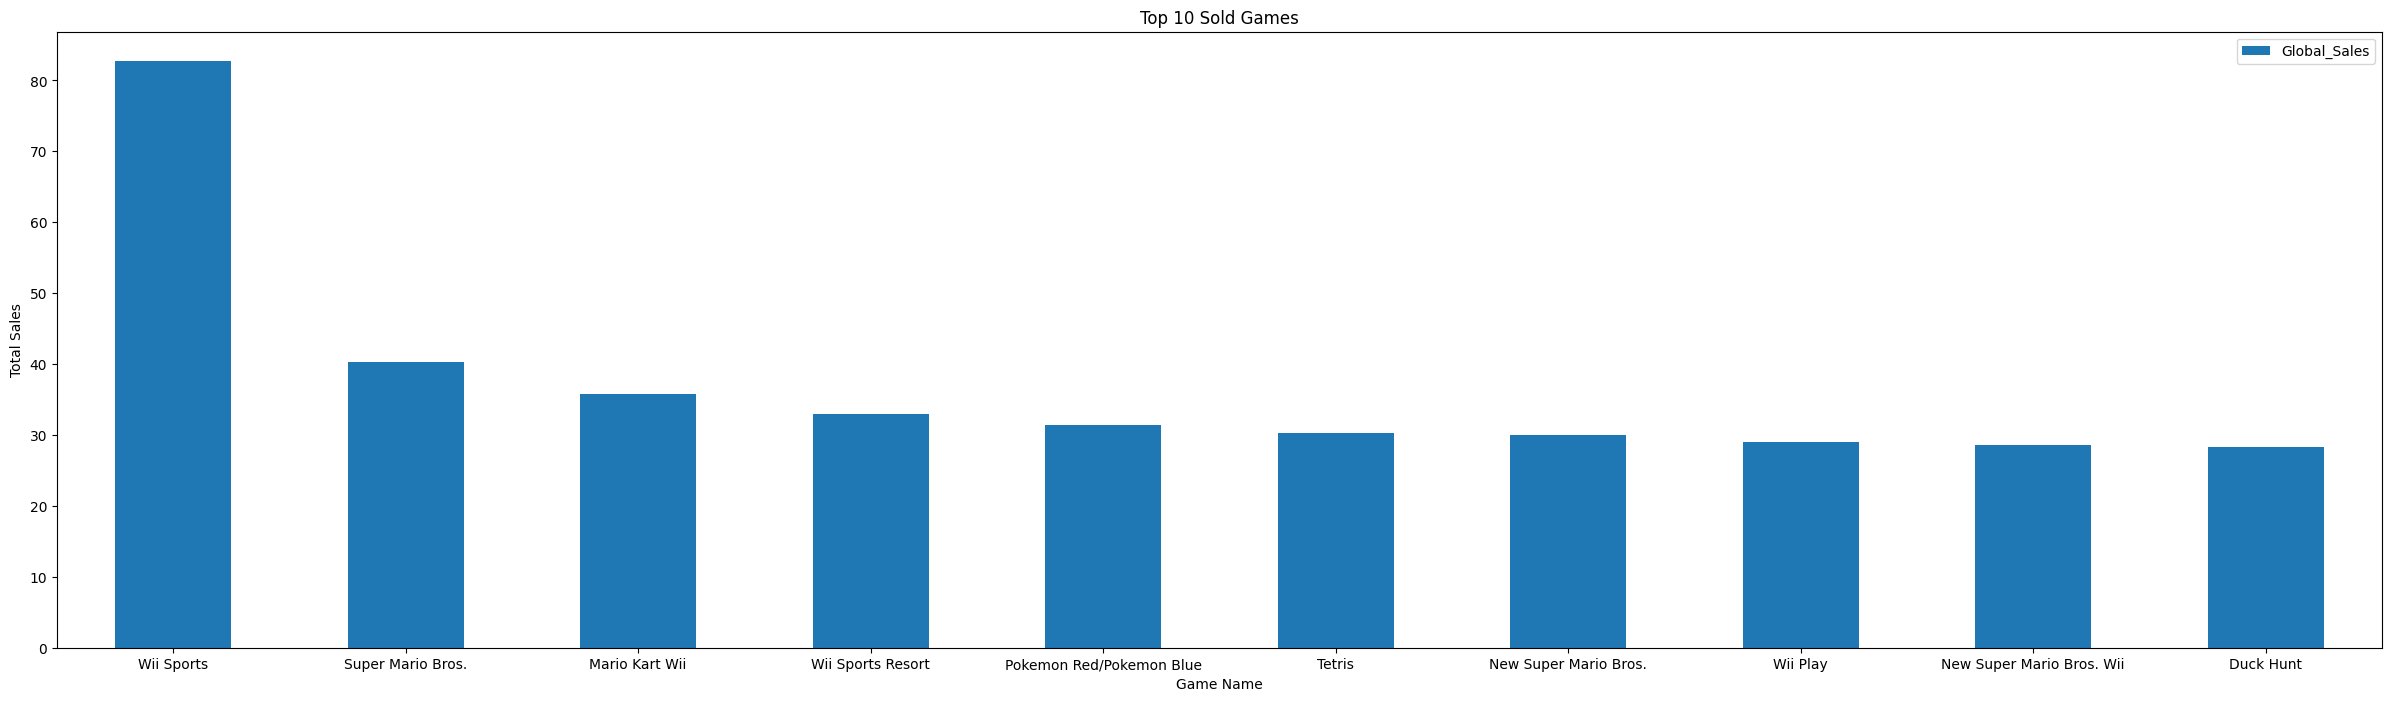

In [47]:
top_10_games_sold_df = dataframe.nlargest(10, "Global_Sales")
display(top_10_games_sold_df)
plot = top_10_games_sold_df.plot(x="Name",y='Global_Sales', kind='bar', rot=0, title='Top 10 Sold Games',figsize=(30,8))
x_label = plot.set_xlabel("Game Name")
y_label = plot.set_ylabel("Total Sales")


**3. Which publisher makes the best games in each genre (sold the most games of a genre)**
>*(reason: Additional information for experienced players to explore the publisher's game with the best selling of the genre that players interested)*

In [48]:
publisher_df = dataframe.groupby("Genre")

genres,publishers, sales = [],[],[]
for scalar, df in publisher_df:
    publisher_genre_df = df.groupby("Publisher")
    sales_lst = [(publisher,sub_df["Global_Sales"].sum()) for publisher, sub_df in publisher_genre_df]
    sales_lst.sort(key=lambda x:x[1], reverse=True)

    genres.append(scalar)
    sale = "{:.2f}".format(sales_lst[0][1])
    publisher = sales_lst[0][0]
    publishers.append(publisher)
    sales.append(sale)

best_genre_publisher_df = pd.DataFrame({"Genre": genres, "Publisher": publishers, "Sales (in millions)" : sales})
display(best_genre_publisher_df)


,Genre,Publisher,Sales (in millions)
0,Action,Take-Two Interactive,211.08
1,Adventure,Nintendo,35.71
2,Fighting,THQ,72.86
3,Misc,Nintendo,180.67
4,Platform,Nintendo,427.21
5,Puzzle,Nintendo,124.88
6,Racing,Nintendo,151.30
7,Role-Playing,Nintendo,284.90
8,Shooter,Activision,299.87
9,Simulation,Electronic Arts,89.53


**4. Discover the top old/retro games before the year 2010 (top 3 games sold of each genre)**
>*(reason: Additional information for Experienced players to choose and enjoy the old games easier)*

In [49]:
top_3_old_games_df = dataframe[dataframe["Year"] < 2010].groupby("Genre")

top_3_old_games_table = [(scalar, list(df.nlargest(3, "Global_Sales")["Name"])) for scalar, df in top_3_old_games_df]
top_3_old_games_df = pd.DataFrame(dict(top_3_old_games_table), index=["First", "Second", "Third"])
display(top_3_old_games_df)


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
First,Grand Theft Auto: San Andreas,Super Mario Land 2: 6 Golden Coins,Super Smash Bros. Brawl,Wii Play,Super Mario Bros.,Tetris,Mario Kart Wii,Pokemon Red/Pokemon Blue,Duck Hunt,Nintendogs,Wii Sports,Pokemon Stadium
Second,Grand Theft Auto: Vice City,Assassin's Creed,Tekken 3,Brain Age: Train Your Brain in Minutes a Day,New Super Mario Bros.,Brain Age 2: More Training in Minutes a Day,Mario Kart DS,Pokemon Gold/Pokemon Silver,Call of Duty: Modern Warfare 2,Animal Crossing: Wild World,Wii Sports Resort,Warzone 2100
Third,Grand Theft Auto III,Assassin's Creed,Super Smash Bros. Melee,Mario Party DS,New Super Mario Bros. Wii,Pac-Man,Gran Turismo 3: A-Spec,Pokemon Diamond/Pokemon Pearl,Halo 3,The Sims 3,Wii Fit,Warcraft II: Tides of Darkness


**5. Popular platform between year 2010 and 2015 (based on sales)**
>*(reason: General information for experienced players to choose a new platform for relatively new gameplay)*

Platform PS3 is the most popular platform between year 2010 and 2015, had 581.63 millions game sales on this platform.


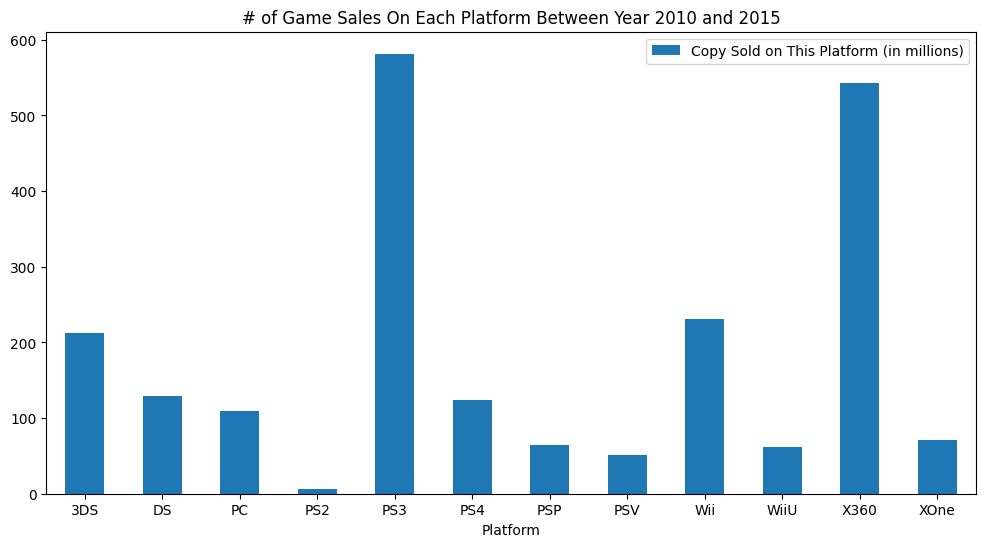

In [50]:
curr_pop_platoform_df = dataframe.loc[(dataframe["Year"] >= 2010) & (dataframe["Year"] < 2015)].groupby("Platform")
curr_pop_platoform_table = [(scalar,float("{:.2f}".format(df["Global_Sales"].sum()))) for scalar,df in curr_pop_platoform_df]
curr_pop_platoform_df = pd.DataFrame(curr_pop_platoform_table, columns=["Platform", "Copy Sold on This Platform (in millions)"])
plot = curr_pop_platoform_df.plot(x="Platform", y="Copy Sold on This Platform (in millions)", kind='bar', rot=0, title='# of Game Sales On Each Platform Between Year 2010 and 2015', figsize=(len(curr_pop_platoform_df.index),6))
print(f"Platform {curr_pop_platoform_df["Platform"].iloc[curr_pop_platoform_df["Copy Sold on This Platform (in millions)"].idxmax()]} is the most popular platform between year 2010 and 2015, had {curr_pop_platoform_df["Copy Sold on This Platform (in millions)"].max()} millions game sales on this platform.")

<div style="font-size: 30px">
    For New Gamers:
</div>

**1. The Platform that has the most Genre.** <br>
>*(reason: Which platform should a new gamer choose to start with and be comprehensive in genres)*

Majority of platforms contain all types of genre (12 genres).


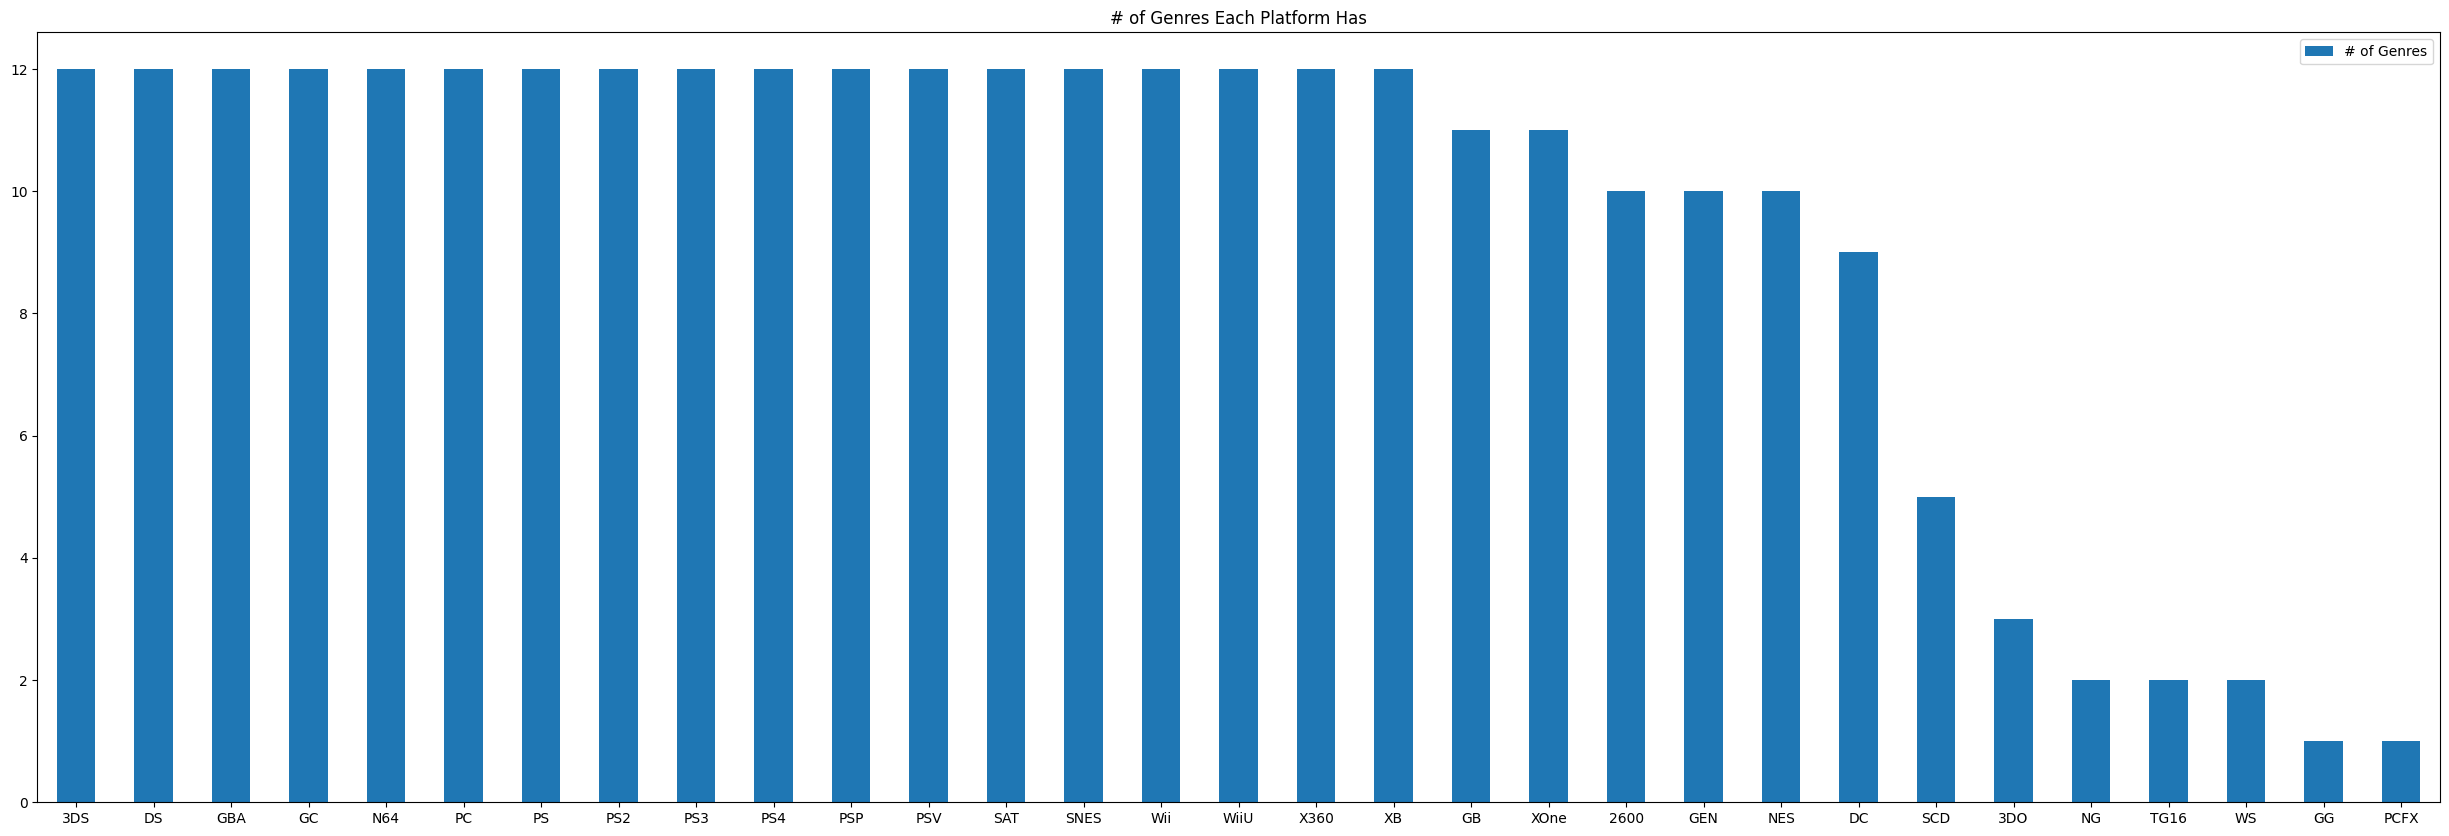

In [51]:
platform_df = dataframe.groupby("Platform")
lst_platform_and_num_of_genre = [(scalar, len(df["Genre"].drop_duplicates())) for scalar, df in platform_df]
lst_platform_and_num_of_genre.sort(key=lambda x: x[1], reverse=True)
df_platform_and_num_of_genre = pd.DataFrame({"# of Genres":[num_genre for plat, num_genre in lst_platform_and_num_of_genre]} ,index=[plat for plat, num_genre in lst_platform_and_num_of_genre])
df_platform_and_num_of_genre.plot(y='# of Genres',kind='bar', rot=0, title='# of Genres Each Platform Has',figsize=(len(df_platform_and_num_of_genre.index),10))
print(f"Majority of platforms contain all types of genre ({df_platform_and_num_of_genre["# of Genres"].max()} genres).")


**2. The Platform that has the most unique game titles**
>*(reason: Additional information about the platform has the most game titles as a spec to consider a platform)*

DS is the platform that has the most unique game titles (2163 counts).


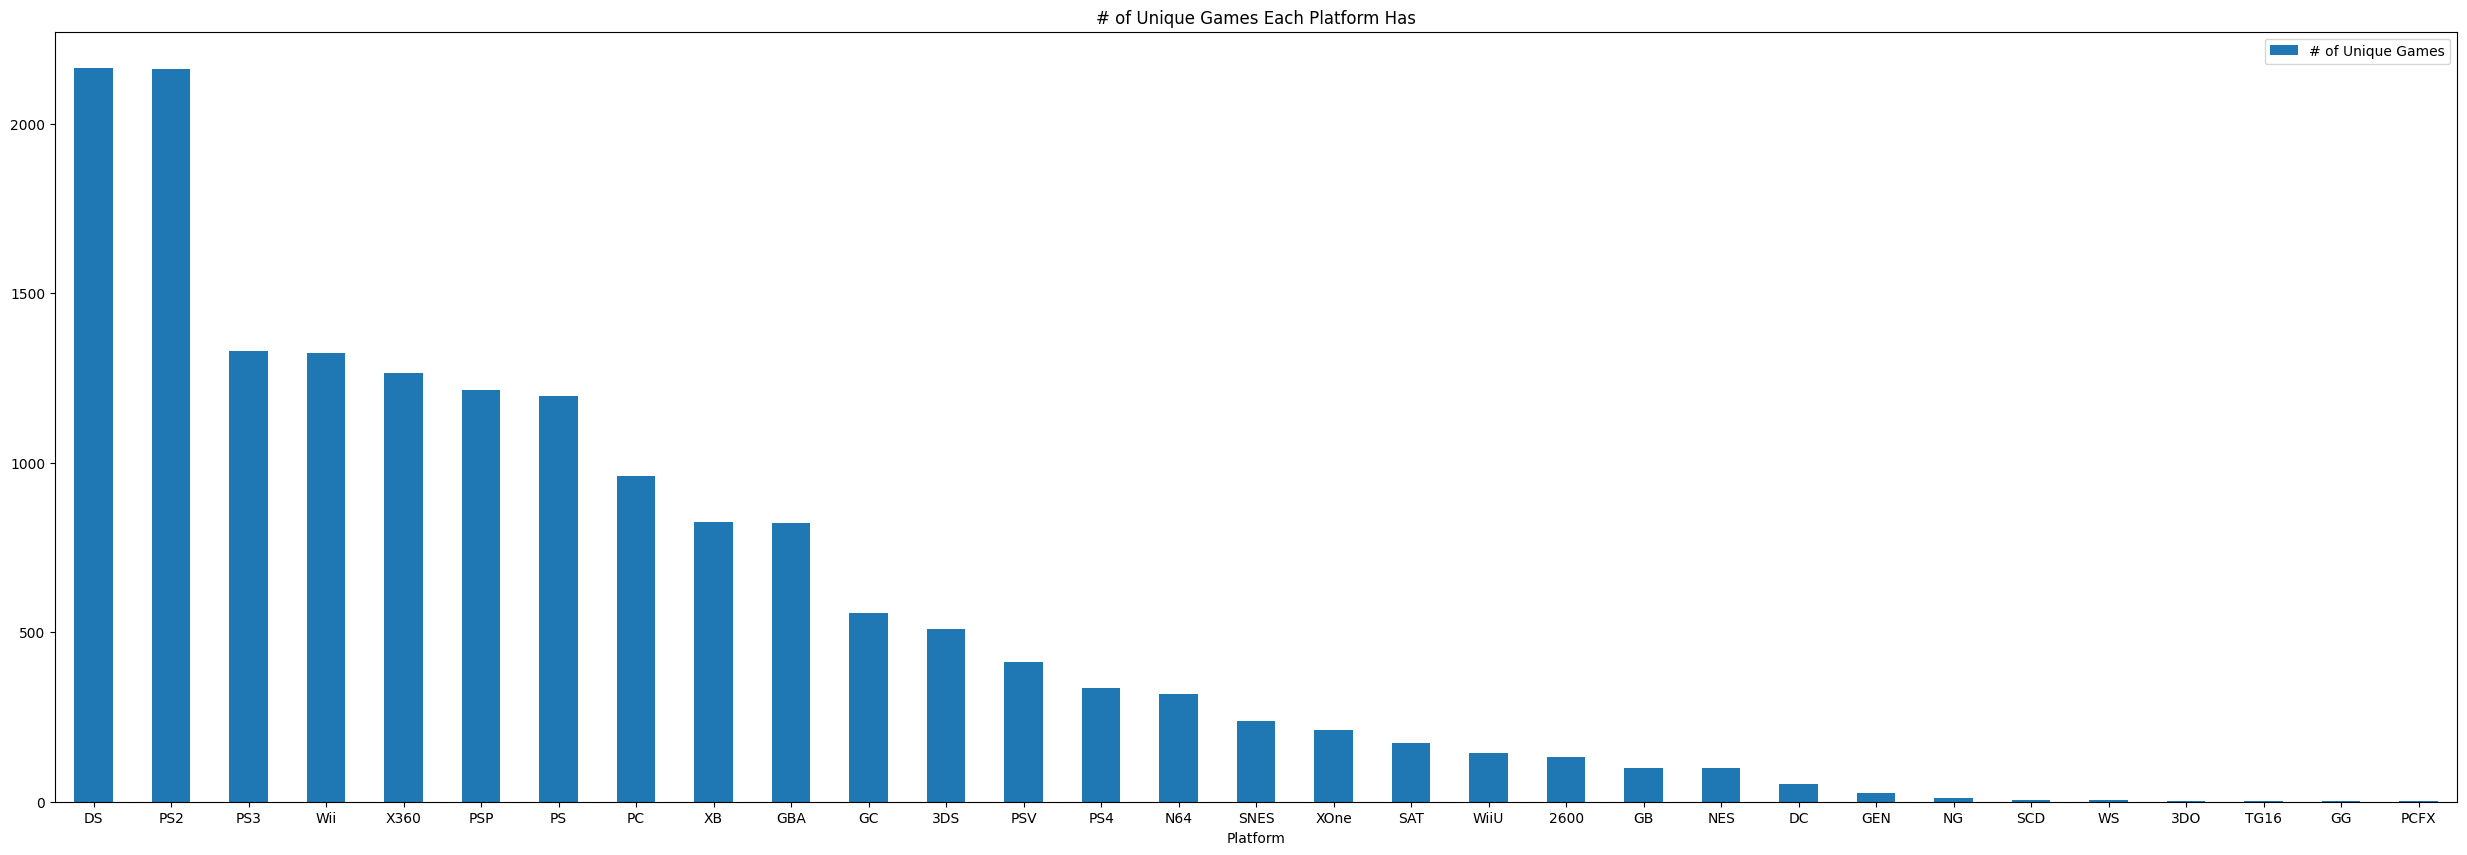

In [52]:
platform_total_unique_game_df = dataframe.groupby("Platform")
platform_total_unique_game_table = [(scalar,len(df.drop_duplicates())) for (scalar, df) in platform_total_unique_game_df]
platform_total_unique_game_table.sort(key=lambda x: x[1], reverse=True)
platform_total_unique_game_df = pd.DataFrame(platform_total_unique_game_table, columns=["Platform","# of Unique Games"])
platform_total_unique_game_df.plot(x="Platform", y="# of Unique Games",kind='bar', rot=0, title='# of Unique Games Each Platform Has',figsize=(len(platform_total_unique_game_df.index),10))
print(f"{platform_total_unique_game_df["Platform"].iloc[platform_total_unique_game_df["# of Unique Games"].idxmax()]} is the platform that has the most unique game titles ({platform_total_unique_game_df["# of Unique Games"].max()} counts).")

**3. The most popular Genre (which means a Genre has the most unique title of games)**
>*(reason: General information about what genre is popular genre and worth to try)*

Action is the genre that has the most unique titles (3316 counts).

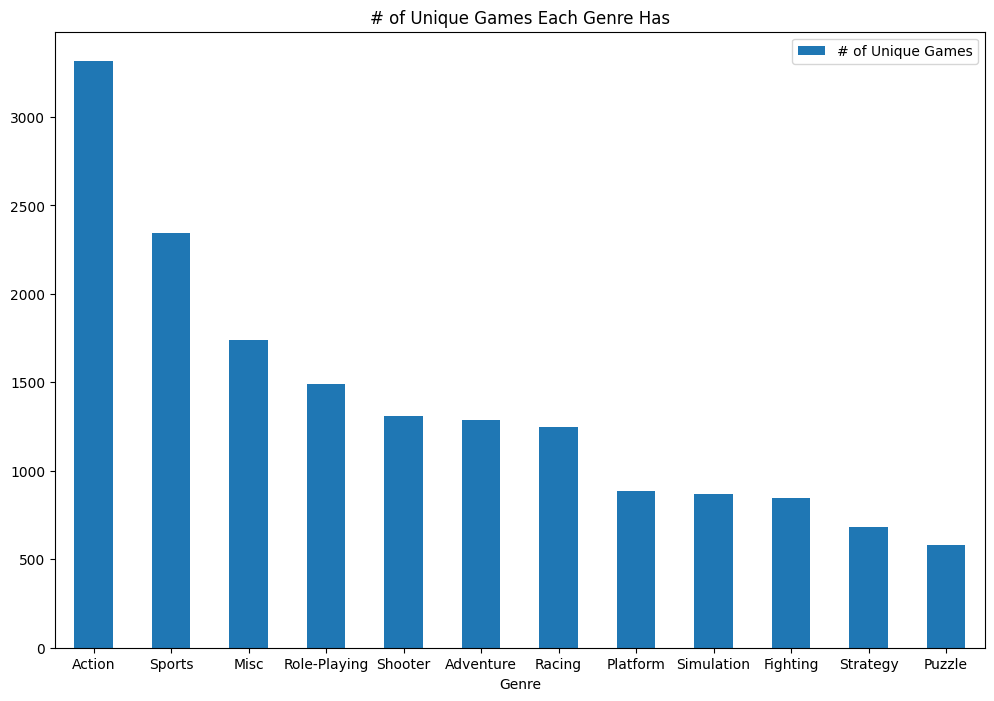

In [53]:
genre_total_unique_game_df = dataframe.groupby("Genre")
genre_total_unique_game_table = [(scalar,len(df.drop_duplicates())) for (scalar, df) in genre_total_unique_game_df]
genre_total_unique_game_table.sort(key=lambda x: x[1], reverse=True)
genre_total_unique_game_df = pd.DataFrame(genre_total_unique_game_table, columns=["Genre","# of Unique Games"])
genre_total_unique_game_df.plot(x="Genre", y="# of Unique Games", kind='bar', rot=0, title='# of Unique Games Each Genre Has', figsize=(len(genre_total_unique_game_df.index),8))
print(f"{genre_total_unique_game_df["Genre"].iloc[genre_total_unique_game_df["# of Unique Games"].idxmax()]} is the genre that has the most unique titles ({genre_total_unique_game_df["# of Unique Games"].max()} counts).")

**4. List of most sold games in each genre**
>*(reason: List the most popular game in each genre offer some information for new gamers which game is a good start for a specific genre)*

In [54]:
genre_most_sold_game_df = dataframe.groupby("Genre")
scalars, game_names, years, platforms, sales = [],[],[],[],[]
for scalar, df in genre_most_sold_game_df:
    index = df["Global_Sales"].idxmax()

    scalars.append(scalar)

    game_name = df["Name"].iloc[index]
    game_names.append(game_name)

    year = df["Year"].iloc[index]
    years.append(int(year))

    platform = df["Platform"].iloc[index]
    platforms.append(platform)

    sale = df["Global_Sales"].max()
    sales.append(sale)

genre_most_sold_game_df = pd.DataFrame({"Genre": scalars, "Game Name": game_names, "Year": years, "Platform": platforms, "Total Sales (in millions)": sales})
print("Most sold game in each genre:")
display(genre_most_sold_game_df)

Most sold game in each genre:


,Genre,Game Name,Year,Platform,Total Sales (in millions)
0,Action,The Legend of Zelda,1986,NES,21.40
1,Adventure,Mega Man Legends,1997,PS,11.18
2,Fighting,Dissidia: Final Fantasy,2008,PSP,13.04
3,Misc,Wii Party,2010,Wii,29.02
4,Platform,New Super Mario Bros.,2006,DS,40.24
5,Puzzle,Professor Layton and the Curious Village,2007,DS,30.26
6,Racing,Gran Turismo 3: A-Spec,2001,PS2,35.82
7,Role-Playing,Pokemon Black/Pokemon White,2010,DS,31.37
8,Shooter,Halo 3,2007,X360,28.31
9,Simulation,MySims,2007,DS,24.76


**5. The Publisher that has the most sales across all game titles (with all Publisher's sales)**
>*(reason: Help new gamers know which publisher has the best reputation that sales their games the most among other publishers)*

Nintendo is the publisher that has the most total sales (1786.56 million).


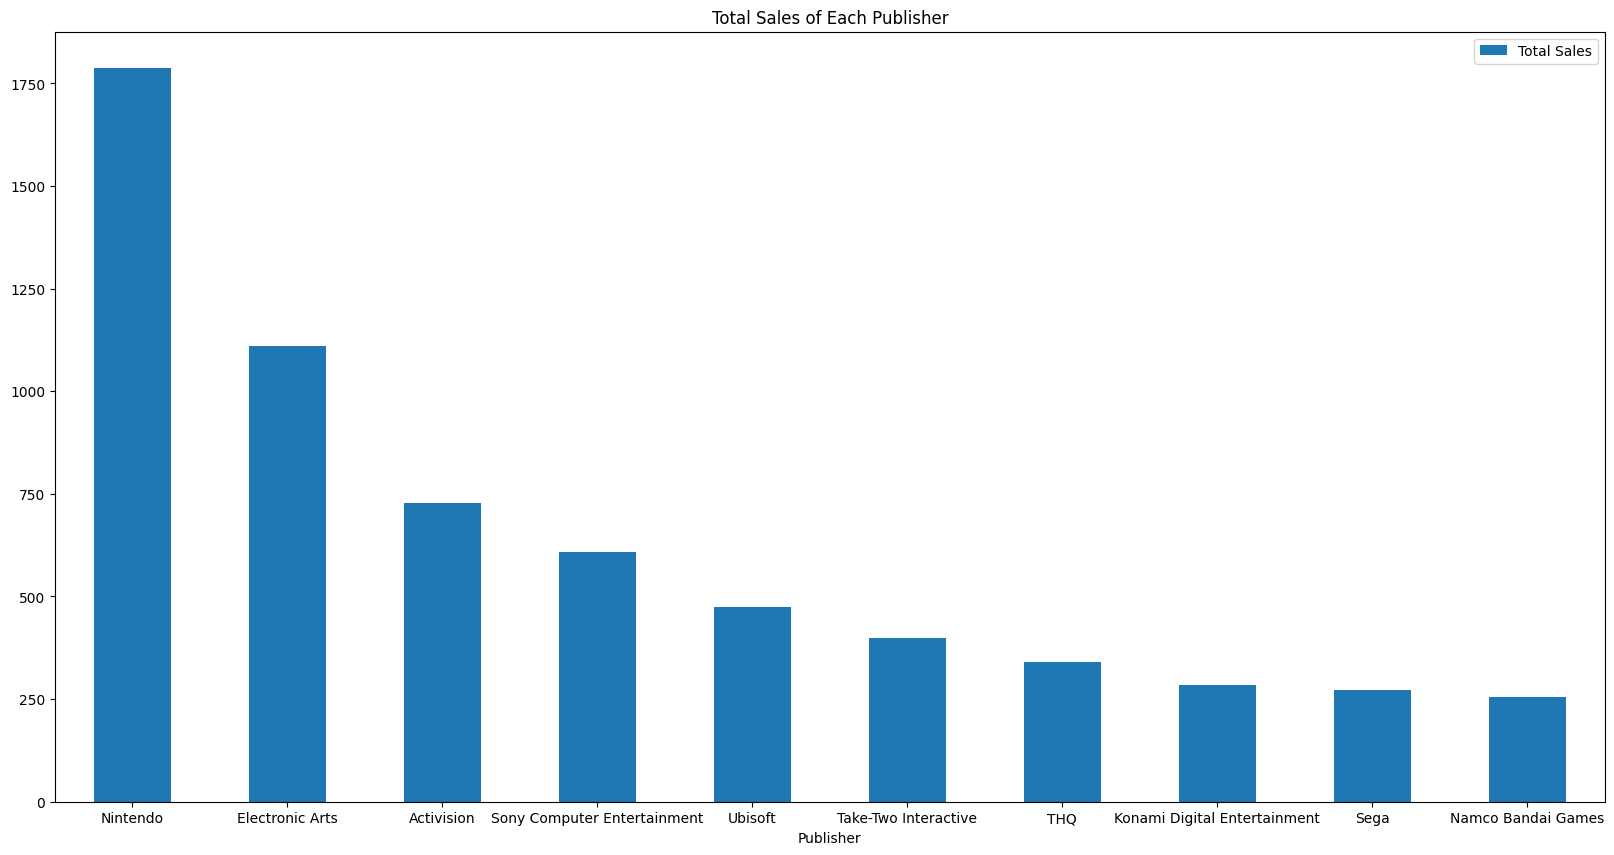

In [55]:
publisher_most_sold_games_df = dataframe.groupby("Publisher")
publisher_most_sold_games_table = [(scalar,df["Global_Sales"].sum()) for scalar, df in publisher_most_sold_games_df]
publisher_most_sold_games_table.sort(key=lambda x: x[1], reverse=True)
top_10_publishers = publisher_most_sold_games_table[:10]
top_10_publishers_most_sold_games_df = pd.DataFrame(top_10_publishers, columns=["Publisher", "Total Sales"])
top_10_publishers_most_sold_games_df.plot(x="Publisher", y='Total Sales', kind='bar', rot=0, title='Total Sales of Each Publisher', figsize=(20,10))

top_1_total_sale = "{:.2f}".format(top_10_publishers_most_sold_games_df["Total Sales"].max())
print(f"{top_10_publishers_most_sold_games_df["Publisher"].iloc[top_10_publishers_most_sold_games_df["Total Sales"].idxmax()]} is the publisher that has the most total sales ({top_1_total_sale} million).")


## Conclusion and Suggestions:

### For Experienced Gamers:

- **Exploring Publisher Catalogs:** Dive into games from different publishers to discover unique titles and gaming experiences. Nintendo stands out with 10 games in the global top 10, making it a must-explore publisher.
  
- **Global Best-Sellers:** Check out the top 10 best-selling games globally to catch up on essential gaming experiences.

- **Genre Exploration:** Identify publishers dominating specific genres to delve deeper into genre-specific games that interest you.

- **Classic Gaming:** Enjoy nostalgic retro games by selecting top titles from each genre pre-2010.

- **Current Platform Trends:** Stay updated on popular gaming platforms post-2010 based on sales to discover new gameplay experiences.
- Based on the analysis of game sales, publishers, and genres, experienced gamers can benefit from exploring a variety of publishers to uncover unique gaming experiences. Nintendo stands out prominently with multiple top-selling games, making it a recommended publisher to explore thoroughly. Additionally, delving into genre-specific bestsellers and discovering top retro games from each category can provide a rich experience of gaming history. Staying updated on current platform trends ensures access to new and exciting gameplay opportunities.

### For New Gamers:

- **Choosing a Comprehensive Platform:** Consider platforms with the most genres to start your gaming journey with a broad selection of game types.
  
- **Exploring Unique Titles:** Look into platforms with the most unique game titles for a diverse gaming library.

- **Popular Genres:** Discover popular genres with many unique game titles to explore widely-loved gaming experiences.

- **Genre Recommendations:** Explore the most sold games in each genre to find standout titles ideal for newcomers in specific gaming categories.

- **Reputable Publishers:** Identify top publishers with the most total sales to start your gaming journey with established developers.
- New gamers can make informed choices by considering platforms with the most diverse genres to start their gaming journey comprehensively. Exploring platforms with a wide range of unique game titles offers varied gaming experiences and options. Discovering popular genres with the most unique titles provides insight into widely-loved gaming categories, while exploring the most sold games in each genre can guide newcomers towards standout titles. Identifying reputable publishers with high total sales ensures a quality gaming experience from established developers.

### *Enjoy your gaming adventures, Gamers!*
